In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import glob
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 設定
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

## 載入資料

In [2]:
data_path = 'Data/'
train = pd.read_csv(os.path.join(data_path, 'train.csv'))
test = pd.read_csv(os.path.join(data_path, 'test.csv'))

print(f"訓練集大小: {train.shape}")
print(f"測試集大小: {test.shape}")

訓練集大小: (1460, 81)
測試集大小: (1459, 80)


### 1. 快速瀏覽資料

In [3]:
# 查看前幾筆資料
# 
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# 基本資訊
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# 統計摘要
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. 目標變數分析

SalePrice 統計:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

偏度: 1.8829
峰度: 6.5363


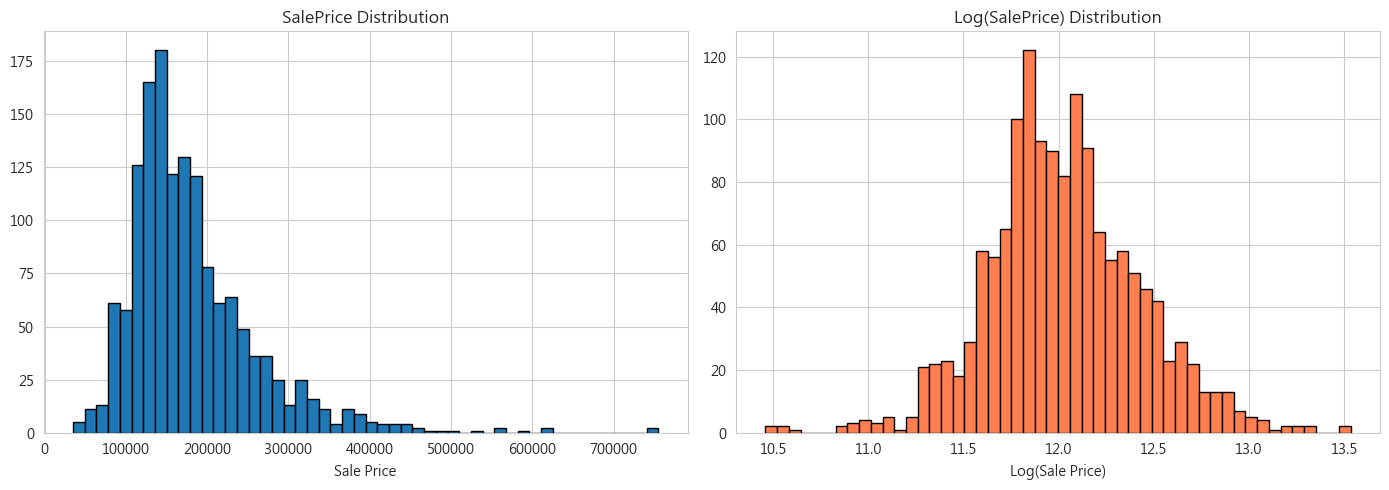

In [6]:
# 基本統計
print("SalePrice 統計:")
print(train['SalePrice'].describe())
print(f"\n偏度: {train['SalePrice'].skew():.4f}")
print(f"峰度: {train['SalePrice'].kurtosis():.4f}")

# 視覺化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 原始分布
axes[0].hist(train['SalePrice'], bins=50, edgecolor='black')
axes[0].set_title('SalePrice Distribution')
axes[0].set_xlabel('Sale Price')

# 對數轉換後
axes[1].hist(np.log1p(train['SalePrice']), bins=50, edgecolor='black', color='coral')
axes[1].set_title('Log(SalePrice) Distribution')
axes[1].set_xlabel('Log(Sale Price)')

plt.tight_layout()
plt.show()

## 3. Missing Value 分析


有 19 個特徵存在缺失值:

              缺失數量  缺失比例(%)
PoolQC        1453    99.52
MiscFeature   1406    96.30
Alley         1369    93.77
Fence         1179    80.75
MasVnrType     872    59.73
FireplaceQu    690    47.26
LotFrontage    259    17.74
GarageType      81     5.55
GarageYrBlt     81     5.55
GarageFinish    81     5.55
GarageQual      81     5.55
GarageCond      81     5.55
BsmtFinType2    38     2.60
BsmtExposure    38     2.60
BsmtFinType1    37     2.53


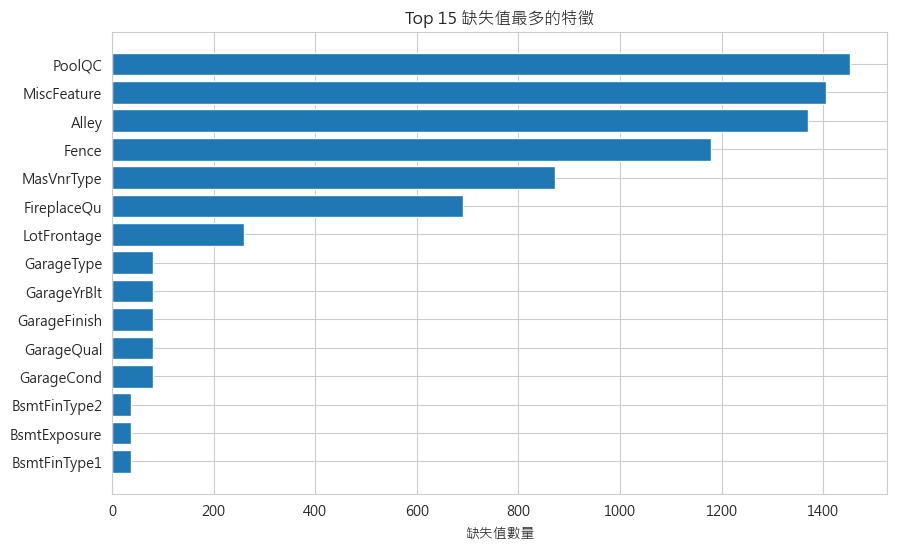

In [7]:
# 計算缺失值
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(train) * 100).round(2)

# 建立缺失值 DataFrame
missing_df = pd.DataFrame({
    '缺失數量': missing,
    '缺失比例(%)': missing_percent
})

print(f"\n有 {len(missing)} 個特徵存在缺失值:\n")
print(missing_df.head(15))

# 視覺化
plt.figure(figsize=(10, 6))
plt.barh(range(len(missing.head(15))), missing.head(15).values)
plt.yticks(range(len(missing.head(15))), missing.head(15).index)
plt.xlabel('缺失值數量')
plt.title('Top 15 缺失值最多的特徵')
plt.gca().invert_yaxis()
plt.show()

## 4. 數值特徵相關性分析

In [9]:
numerical_features = train.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Id')
if 'SalePrice' in numerical_features:
    numerical_features.remove('SalePrice')

# 計算相關係數
correlations = train[numerical_features + ['SalePrice']].corr()['SalePrice']
correlations = correlations.drop('SalePrice').sort_values(ascending=False)

print(f"\nTop 15 與 SalePrice 相關的特徵:\n")
print(correlations.head(15))


Top 15 與 SalePrice 相關的特徵:

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
Name: SalePrice, dtype: float64


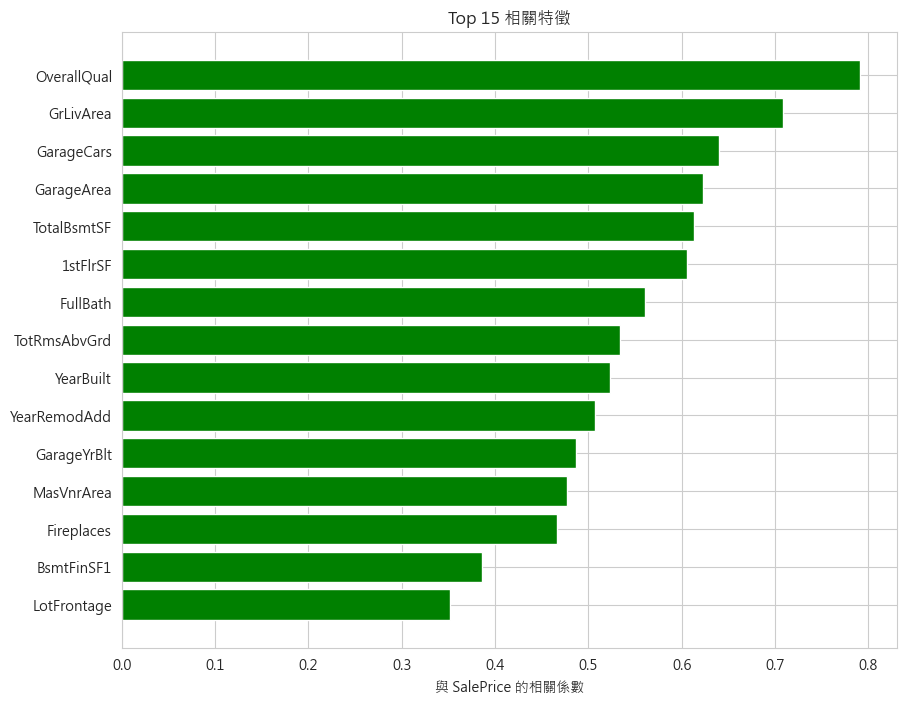

In [10]:
# 視覺化
plt.figure(figsize=(10, 8))
top_corr = correlations.head(15)
colors = ['green' if x > 0 else 'red' for x in top_corr.values]
plt.barh(range(len(top_corr)), top_corr.values, color=colors)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('與 SalePrice 的相關係數')
plt.title('Top 15 相關特徵')
plt.gca().invert_yaxis()
plt.show()

## 5. 關鍵特徵Scatterplot

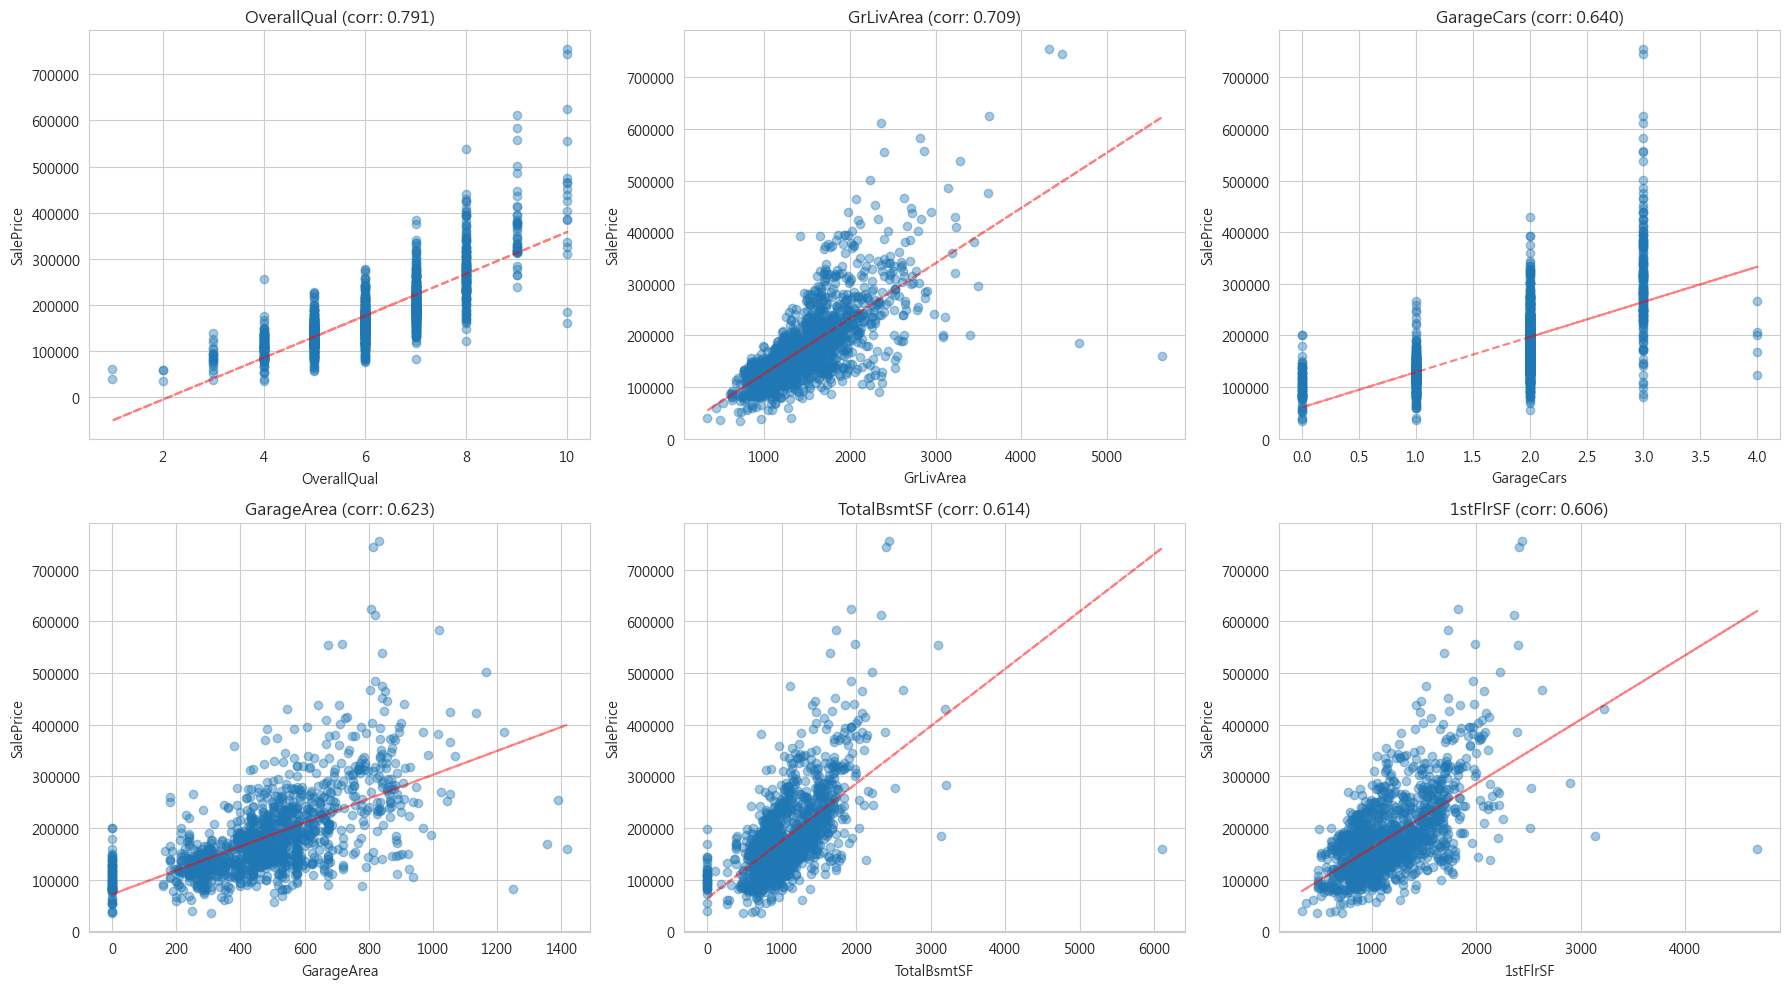

In [11]:
# 選擇 Top 6 特徵
top_features = correlations.head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    axes[i].scatter(train[feature], train['SalePrice'], alpha=0.4)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')
    
    corr = train[[feature, 'SalePrice']].corr().iloc[0, 1]
    axes[i].set_title(f'{feature} (corr: {corr:.3f})')
    
    # 趨勢線
    z = np.polyfit(train[feature].fillna(train[feature].median()), 
                   train['SalePrice'], 1)
    p = np.poly1d(z)
    axes[i].plot(train[feature], p(train[feature]), "r--", alpha=0.5)

plt.tight_layout()
plt.show()

## 6. Correlation Heatmap

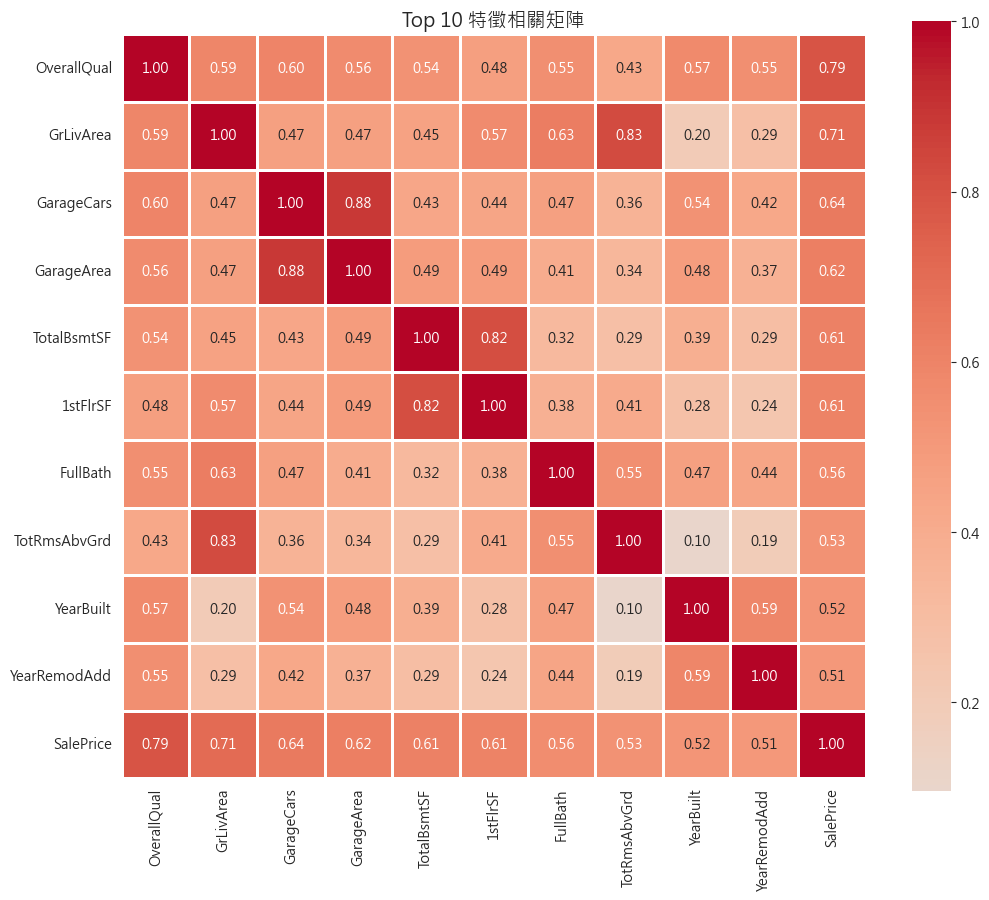

In [12]:
top_corr_features = correlations.head(10).index.tolist() + ['SalePrice']
corr_matrix = train[top_corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Top 10 特徵相關矩陣', fontsize=14)
plt.show()

## 7. 類別特徵分析

In [15]:
# 識別類別特徵
categorical_features = train.select_dtypes(include=['object']).columns.tolist()
print(f"\n類別特徵數量: {len(categorical_features)}")


類別特徵數量: 43


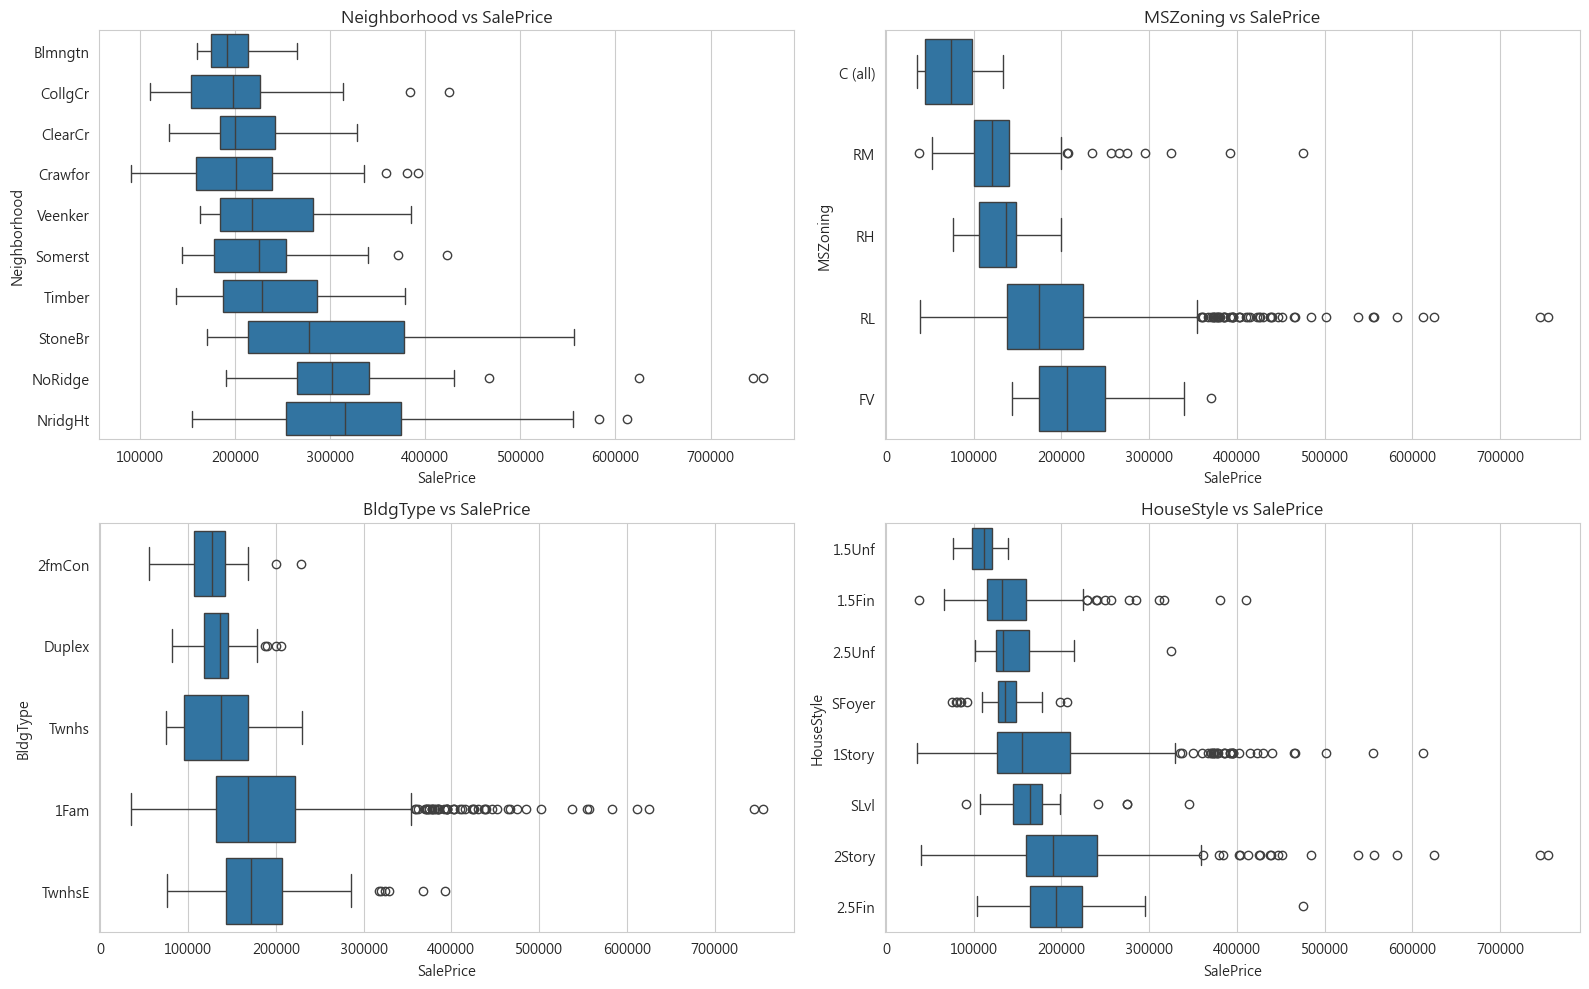

In [16]:
# 分析重要類別特徵
important_categorical = ['Neighborhood', 'MSZoning', 'BldgType', 'HouseStyle']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for i, cat in enumerate(important_categorical):
    # 按中位數排序
    cat_order = train.groupby(cat)['SalePrice'].median().sort_values().index
    
    # 限制顯示數量
    if len(cat_order) > 10:
        cat_order = cat_order[-10:]
        data = train[train[cat].isin(cat_order)]
    else:
        data = train
    
    sns.boxplot(data=data, y=cat, x='SalePrice', order=cat_order, ax=axes[i])
    axes[i].set_title(f'{cat} vs SalePrice')

plt.tight_layout()
plt.show()

In [17]:
# 顯示每個類別特徵的統計
for cat in important_categorical:
    print(f"\n{cat}:")
    print(f"唯一值數量: {train[cat].nunique()}")
    print("\nTop 5 類別:")
    print(train[cat].value_counts().head(5))
    print("\n各類別平均房價:")
    print(train.groupby(cat)['SalePrice'].mean().sort_values(ascending=False).head(5))


Neighborhood:
唯一值數量: 25

Top 5 類別:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Name: count, dtype: int64

各類別平均房價:
Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

MSZoning:
唯一值數量: 5

Top 5 類別:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

各類別平均房價:
MSZoning
FV         214014.061538
RL         191004.994787
RH         131558.375000
RM         126316.830275
C (all)     74528.000000
Name: SalePrice, dtype: float64

BldgType:
唯一值數量: 5

Top 5 類別:
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

各類別平均房價:
BldgType
1Fam      185763.807377
TwnhsE    181959.342105
Twnhs     135911.627907
Duplex    133541.076923
2fmCon    128432.258065
Name: SalePrice, dtype: float64

HouseStyle:
唯一值數量: 8

Top 5 類別:
Hou

## 8. 異常值檢測


發現 2 個異常值:
        Id  GrLivArea  SalePrice
523    524       4676     184750
1298  1299       5642     160000


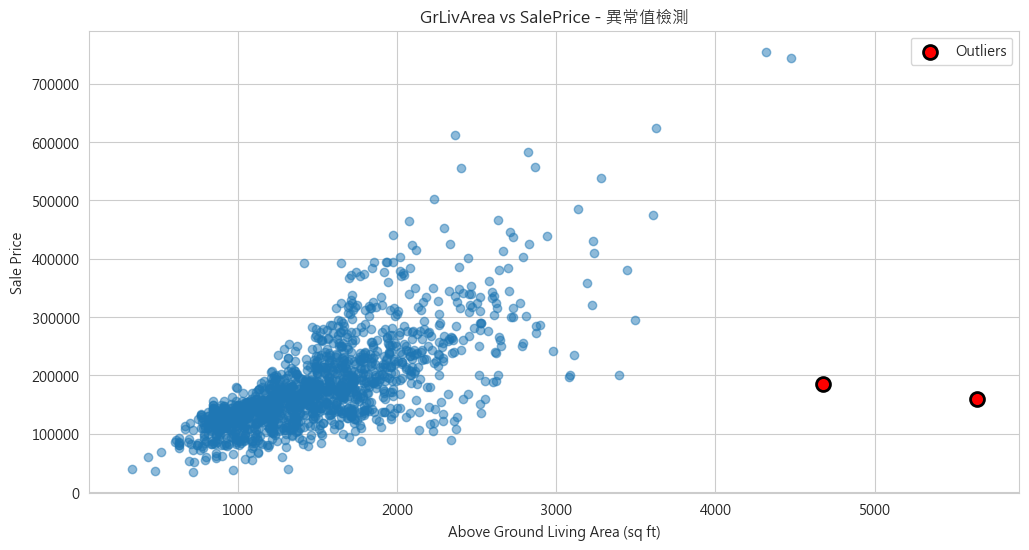

In [18]:
# 檢查 GrLivArea 異常值
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(train['GrLivArea'], train['SalePrice'], alpha=0.5)

# 標記異常值
outliers = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)]
if len(outliers) > 0:
    ax.scatter(outliers['GrLivArea'], outliers['SalePrice'], 
               color='red', s=100, label='Outliers', edgecolors='black', linewidths=2)
    print(f"\n發現 {len(outliers)} 個異常值:")
    print(outliers[['Id', 'GrLivArea', 'SalePrice']])

ax.set_xlabel('Above Ground Living Area (sq ft)')
ax.set_ylabel('Sale Price')
ax.set_title('GrLivArea vs SalePrice - 異常值檢測')
ax.legend()
plt.show()

## 9. 偏度分析


Top 15 高偏度特徵 (需要轉換):
MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
dtype: float64


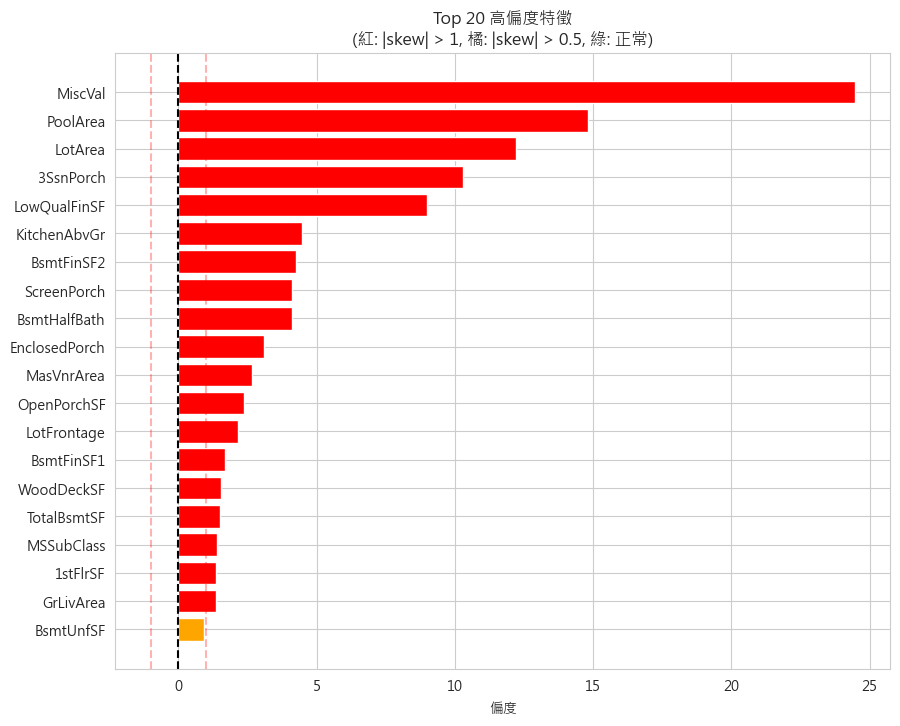

In [19]:
# 計算偏度
skewness = train[numerical_features].apply(lambda x: x.skew())
skewness = skewness.sort_values(ascending=False)

print("\nTop 15 高偏度特徵 (需要轉換):")
print(skewness.head(15))

# 視覺化
plt.figure(figsize=(10, 8))
high_skew = skewness.head(20)
colors = ['red' if abs(x) > 1 else 'orange' if abs(x) > 0.5 else 'green' 
          for x in high_skew.values]
plt.barh(range(len(high_skew)), high_skew.values, color=colors)
plt.yticks(range(len(high_skew)), high_skew.index)
plt.xlabel('偏度')
plt.title('Top 20 高偏度特徵\n(紅: |skew| > 1, 橘: |skew| > 0.5, 綠: 正常)')
plt.axvline(x=0, color='black', linestyle='--')
plt.axvline(x=1, color='red', linestyle='--', alpha=0.3)
plt.axvline(x=-1, color='red', linestyle='--', alpha=0.3)
plt.gca().invert_yaxis()
plt.show()